In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import resample
import sounddevice as sd
from PIL import Image

In [24]:
def play_waveform(y, sample_rate=44100):
    tot = y.astype(np.float32)
    wavfile.write('arcticmonkeys.wav',int(sample_rate),tot)
    return Audio(y, rate=sample_rate)

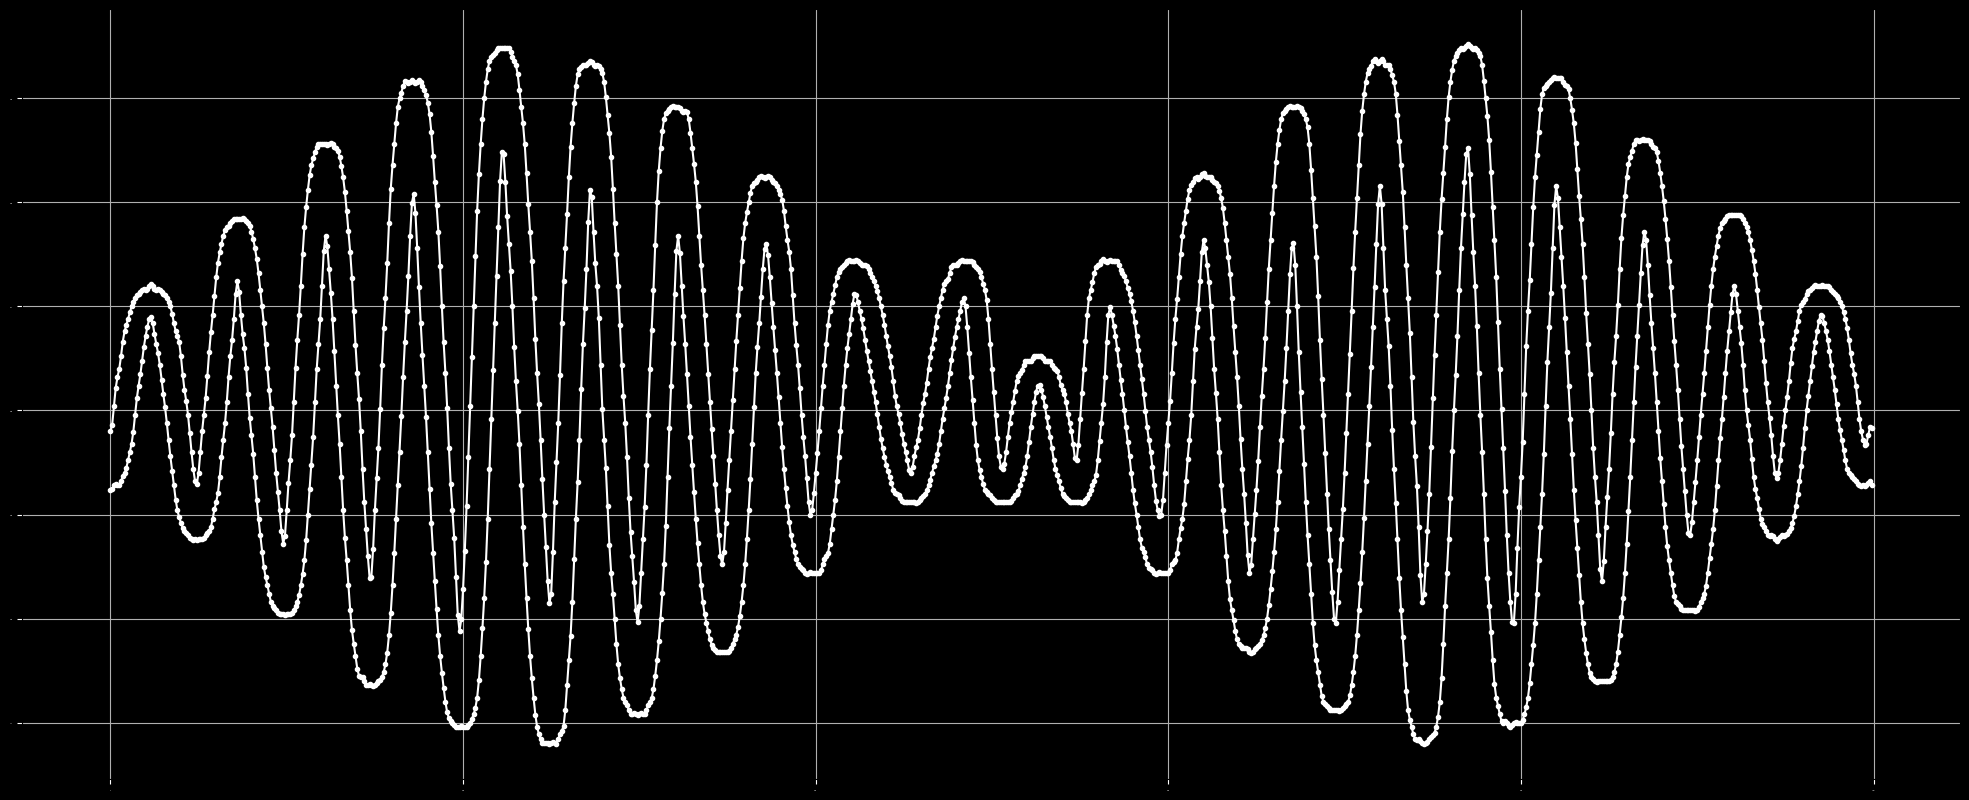

In [44]:
image_path = 'AM _(Arctic_Monkeys).jpg'
img = Image.open(image_path)
img = img.convert('L') 
img_array = np.array(img)

height, width = img_array.shape
waveform_max = np.zeros(width)
waveform_min = np.zeros(width)
for x in range(width):
    col = img_array[:, x]
    waveform_max[x] = np.max(np.where(col > 50))
    waveform_min[x] = np.min(np.where(col > 50))


#waveform_max = waveform_max / np.max(waveform_max)
#waveform_min = waveform_min / np.max(waveform_min) 


plt.figure(figsize=(25, 10))
plt.plot(resample(waveform_max, len(waveform_max)*2), c='white', marker='.')
plt.plot(resample(waveform_min, len(waveform_min)*2), c='white', marker='.')

ax = plt.gca()
plt.gcf().set_facecolor("black")
ax.set_facecolor("black")
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
#ax.tick_params(axis='both', colors='black', which='both', labelcolor='black', labelsize=0)

ax.tick_params(axis='both', colors='white', which='both', labelcolor='white', labelsize=0)
plt.grid('white')

plt.savefig('AM - simul')
plt.show()

44.0


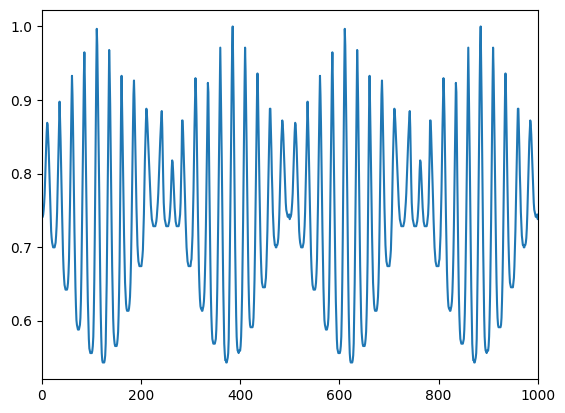

In [92]:
sample_rate = 44100

duration = 1
n = int(sample_rate / len(waveform_min) * duration)
signal = np.tile(waveform_min, n)
plt.plot(signal)
plt.xlim(0,1000)

print(n/2)
play_waveform(signal, sample_rate)

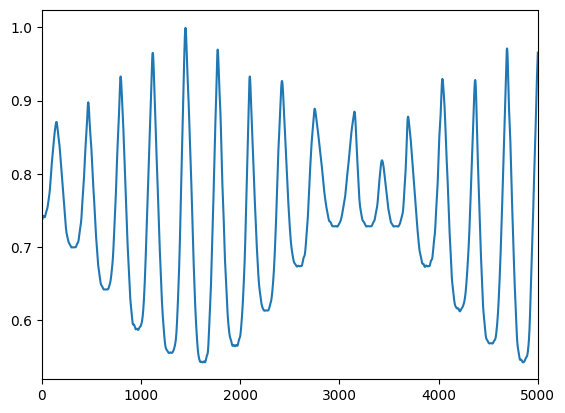

In [93]:
f = 13
resampled_signal = resample(signal, sample_rate * f)

plt.plot(resampled_signal)
plt.xlim(0,5000)
plt.show()

play_waveform(resampled_signal)
